In [ ]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

In [3]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 10                  # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [5]:
origin = load_data('traffic_acc')
origin

[data] https://data.hossam.kr/data/lab04/traffic_acc.xlsx
[desc] 2005년 1월 부터 2018년 12월 까지 월별 교통사고의 발생건수,부상자수,사망자수 데이터(인덱스/메타데이터 없음, 출처: 공공데이터포털)
[!] Cannot read metadata


,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


In [7]:
df = origin.drop('월', axis = 1).groupby('년도').mean()
df

,발생건수,사망자수,부상자수
년도,,,
2005,17847.583333,531.333333,28519.416667
2006,17812.083333,527.250000,28352.416667
2007,17638.500000,513.833333,27992.166667
2008,17985.166667,489.166667,28246.833333
2009,19332.500000,486.500000,30156.250000
2010,18906.500000,458.750000,29371.500000
2011,18475.916667,435.750000,28449.250000
2012,18638.000000,449.333333,28713.750000
2013,17946.166667,424.333333,27392.583333


In [11]:
#pyplot.subplots(행, 열 ,[ figsize=(가로크기, 세로크기)])

서브플롯의 기본 사용

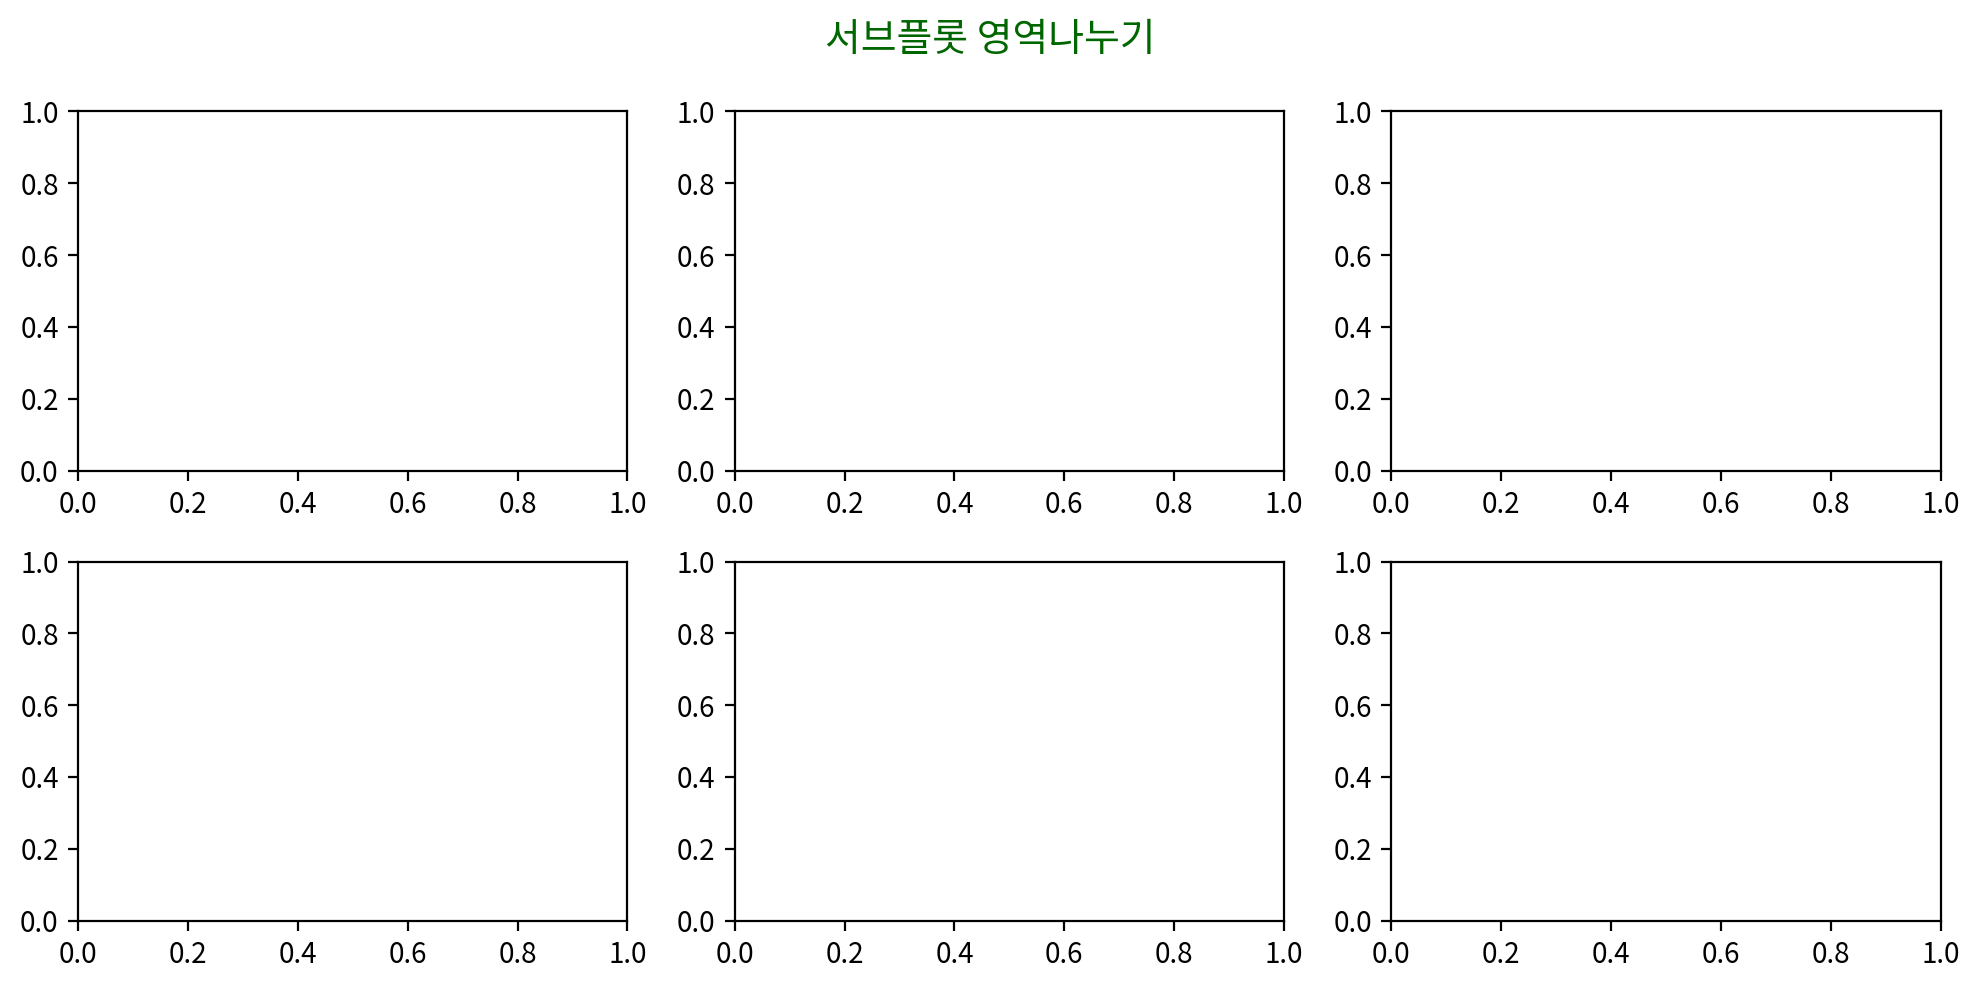

In [15]:
width_px = 2000
height_px = 1000
rows = 2
cols = 3
figsize = (width_px/ my_dpi, height_px/ my_dpi)


fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

fig.suptitle('서브플롯 영역나누기', fontsize=14, color='#006600')

fig.subplots_adjust(wspace=0.2, hspace=0.2)
plt.tight_layout()
plt.show()
plt.close()

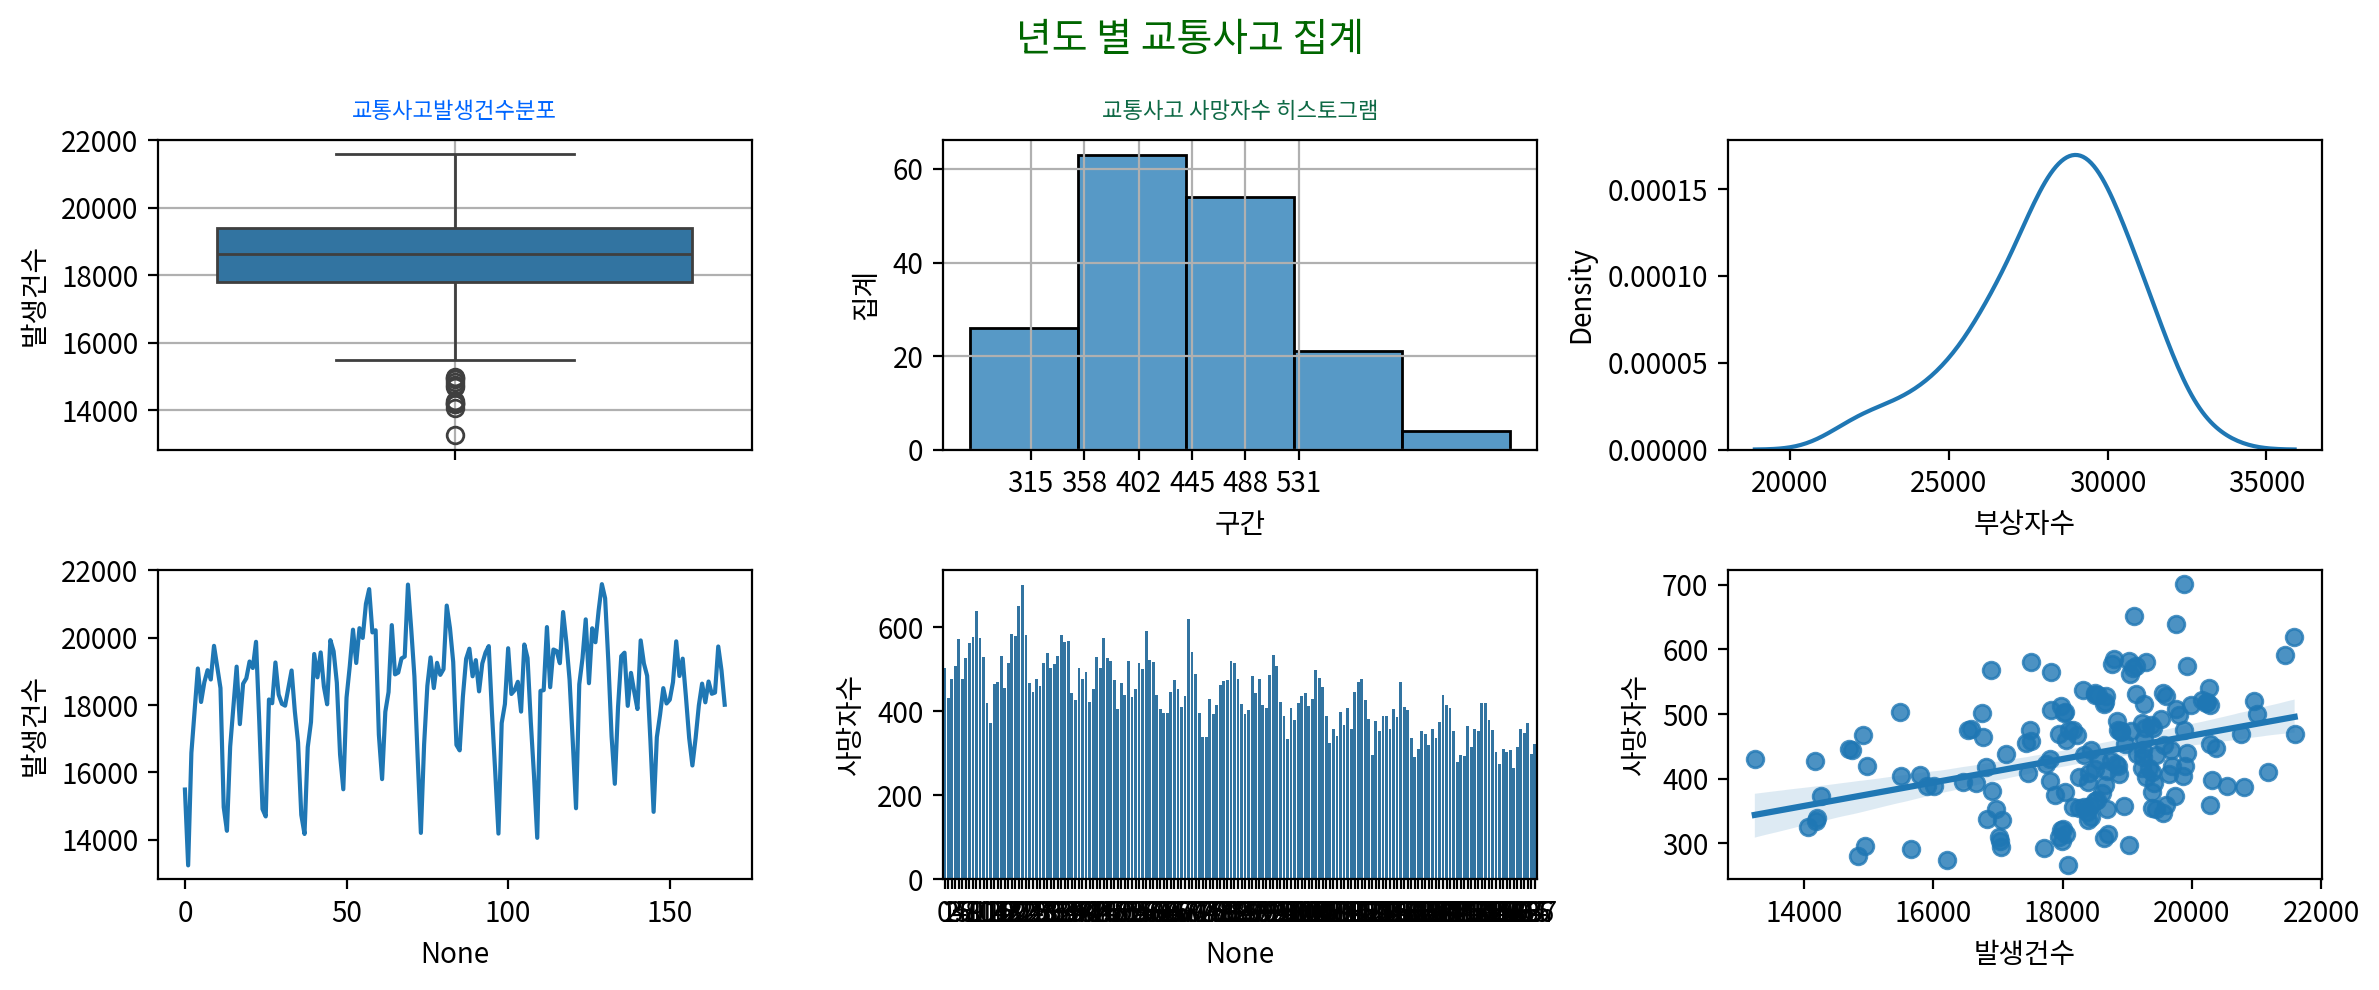

In [23]:
width_px = 2400
height_px = 1000
rows = 2
cols = 3
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

# 그래프 그리기
sb.boxplot(data=origin,y='발생건수', ax=ax[0][0])
sb.histplot(data=origin, x='사망자수', bins=5, ax=ax[0][1])
sb.kdeplot(data=origin, x='부상자수', ax=ax[0][2])
sb.lineplot(data=origin, x=origin.index, y='발생건수', ax=ax[1][0])
sb.barplot(data=origin, x=origin.index, y='사망자수', estimator=np.sum,
           ax=ax[1][1])
sb.regplot(data=origin, x='발생건수', y='사망자수', ax=ax[1][2])

#그래프 꾸미기

fig.suptitle('년도 별 교통사고 집계', fontsize=14, color='#006600')
fig.subplots_adjust(wspace=0.2, hspace=0.2)
ax[0][0].set_title("교통사고발생건수분포", color="#0066ff", fontsize=8,pad=8)
ax[0][0].grid()
#-------------

hist, bins = np.histogram(df['사망자수'], bins=5)
bins = bins.round().astype("int")
ax[0][1].set_title("교통사고 사망자수 히스토그램", color="#0f6a46",fontsize=8, pad=8)
ax[0][1].set_xticks(bins, bins)
ax[0][1].set_xlabel('구간')
ax[0][1].set_ylabel('집계')
ax[0][1].grid()


plt.tight_layout()
plt.show()
plt.close()

두 개의 y축을 갖는 그래프

In [25]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
y1 = np.arange(10)
y1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
y2 = x**2
y2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

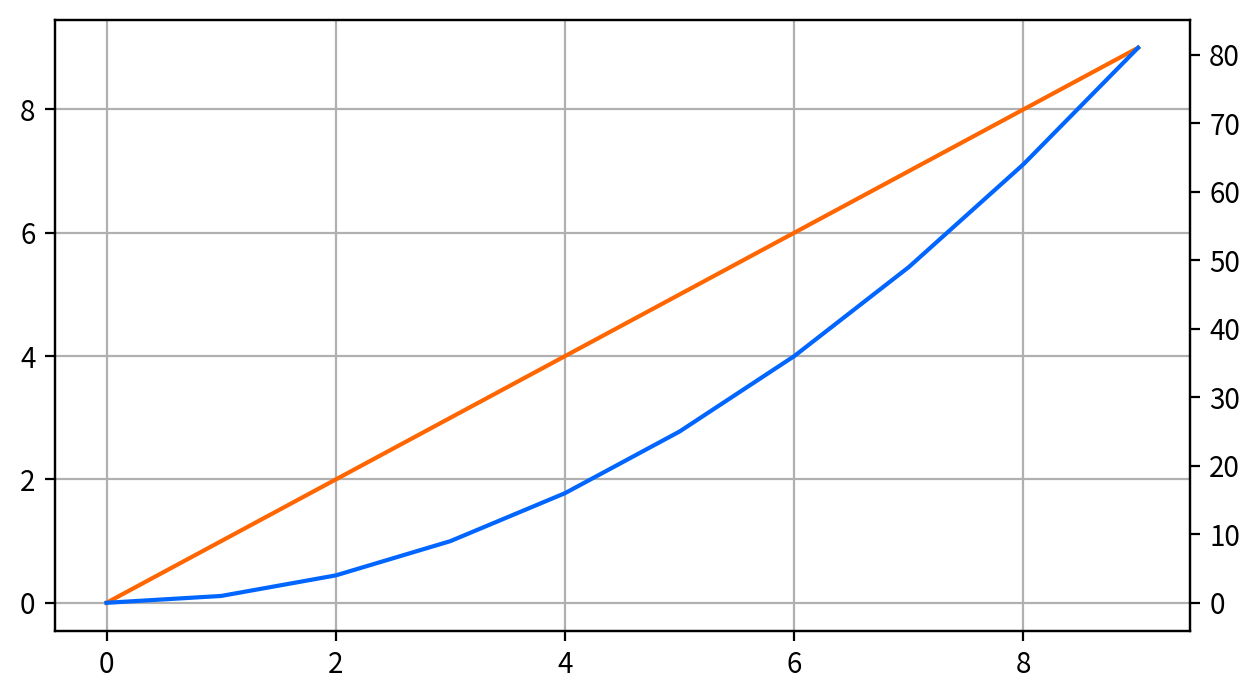

In [ ]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax1 = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

#ax1에 겹쳐지는 쌍둥이 서브플롯을 생성
ax2 = ax1.twinx()

#lineplot그리기
sb.lineplot(x=x, y=y1, color="#ff6600", ax=ax1)
sb.lineplot(x=x, y=y2, color="#0066ff", ax=ax2)




ax1.grid(True)    #그래프가 겹쳐지므로 격자는 하나만 표시


plt.tight_layout()
plt.show()
plt.close()

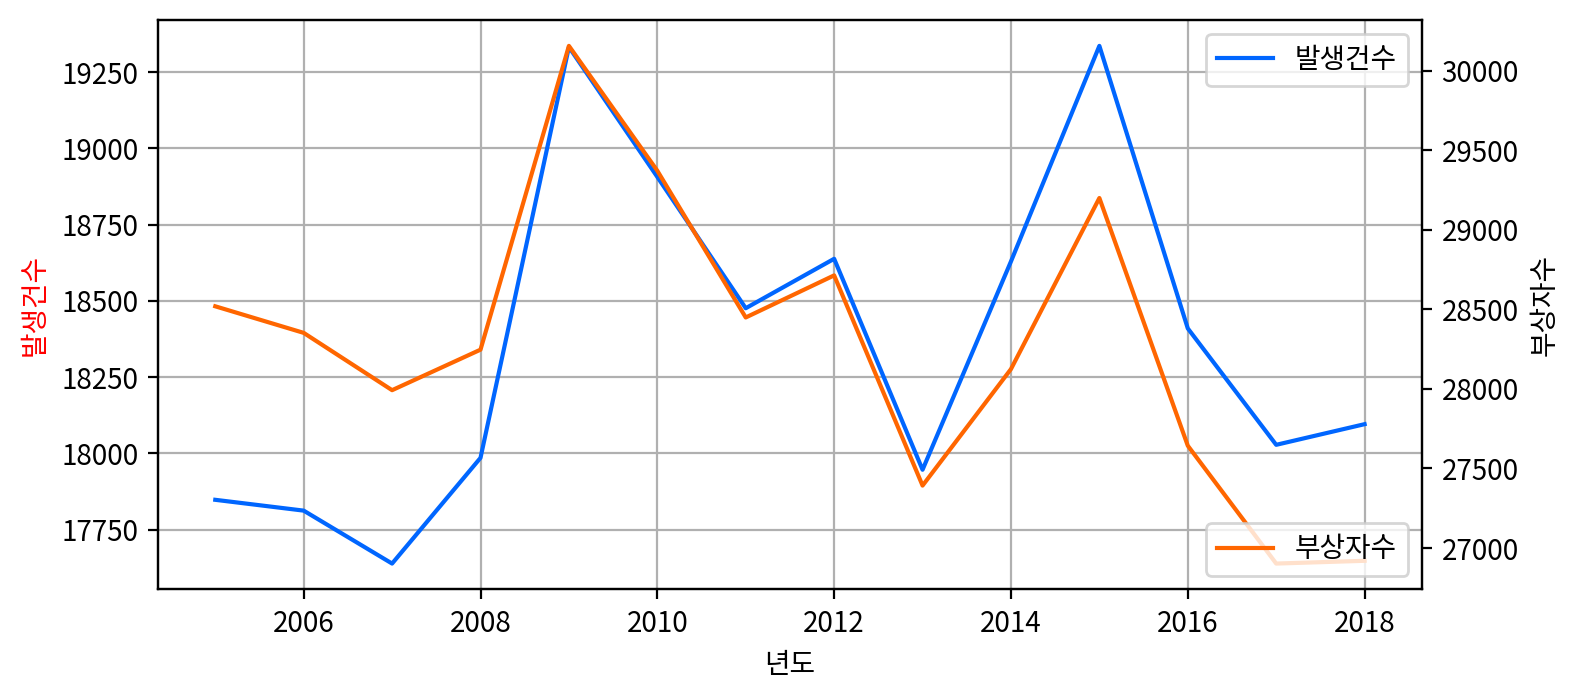

In [41]:
width_px = 1600
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax1 = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)


#ax1에 겹쳐지는 쌍둥이 서브플롯을 생성

ax2 = ax1.twinx()

#라인플롯 그리기
sb.lineplot(data=df, x=df.index, y='발생건수', color='#0066ff',
            ax=ax1, label='발생건수')
sb.lineplot(data=df, x=df.index, y='부상자수', color='#ff6600',
            ax=ax2, label='부상자수')

#그래프 꾸미기

ax1.set_xlabel('년도')
ax1.set_ylabel('발생건수', color='#ff0000')
ax1.grid(True)
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')


plt.tight_layout()
plt.show()

plt.close()